In [1]:
path = '/home/mid166/Analysis/Jupyter/Python/Package/PIASO_github'
import sys
sys.path.append(path)

In [2]:
import importlib

In [3]:
import piaso

In [4]:
import scanpy as sc

In [5]:
sc.set_figure_params(dpi=80,dpi_save=300, color_map='viridis',facecolor='white')
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
save_dir='/n/data1/hms/neurobio/fishell/mindai/Result/single-cell/Methods/PIASO'
sc.settings.figdir = save_dir
prefix='GitHub_testing'

### Load the data

The 20k subsampled snRNA-seq data from Allen SEA-AD project is available in google drive: https://drive.google.com/file/d/1nH-CRaTQFxJ5pAVpy8_hUQn1nrIcakq2/view?usp=drive_link.

The original data is available in https://portal.brain-map.org/explore/seattle-alzheimers-disease.

In [6]:
adata=sc.read('/n/scratch/users/m/mid166/Result/single-cell/Enhancer/SEA-AD/SEA-AD_RNA_MTG_subsample_excludeReference_20k_piaso.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 20000 × 36601
    obs: 'sample_id', 'Neurotypical reference', 'Donor ID', 'Organism', 'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)', 'Race (choice=Black/ African American)', 'Race (choice=Asian)', 'Race (choice=American Indian/ Alaska Native)', 'Race (choice=Native Hawaiian or Pacific Islander)', 'Race (choice=Unknown or unreported)', 'Race (choice=Other)', 'specify other race', 'Hispanic/Latino', 'Highest level of education', 'Years of education', 'PMI', 'Fresh Brain Weight', 'Brain pH', 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Total Microinfarcts (not observed grossly)', 'Total microinfarcts in screening sections', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status', 'Last CASI Score', 'Interval from last CASI in months', 'Last MMSE Score', 'Interval from last MMSE in months', 'Last MOCA Score', 'Interval from last MOCA in mont

#### Use the discrete color map

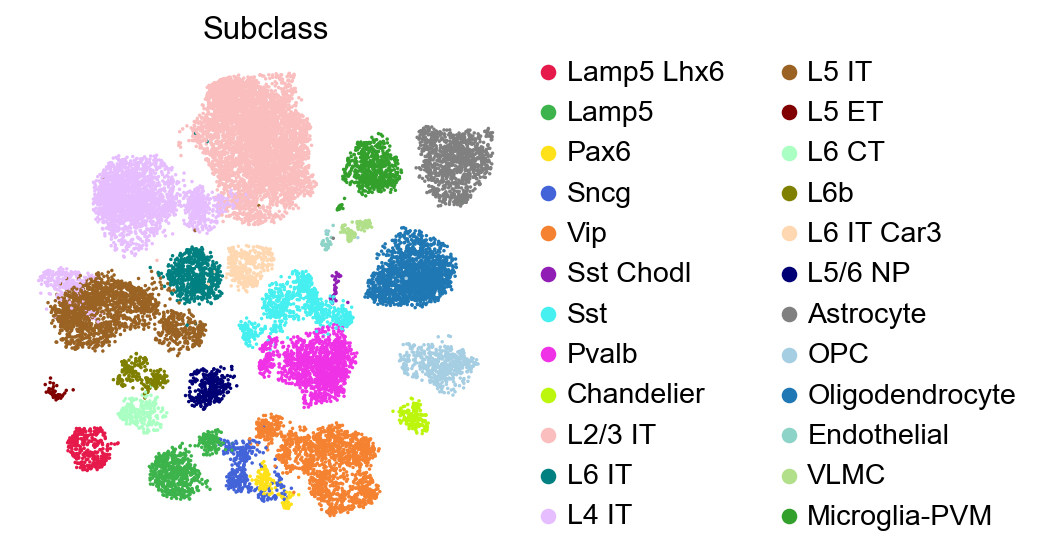

In [8]:
sc.pl.embedding(adata,
            basis='X_umap',
           color=['Subclass'],
           palette=piaso.pl.color.d_color3,
           legend_fontoutline=2,
           legend_fontweight=5,
           cmap='Spectral_r',
           ncols=3,
           size=10,
           frameon=False)

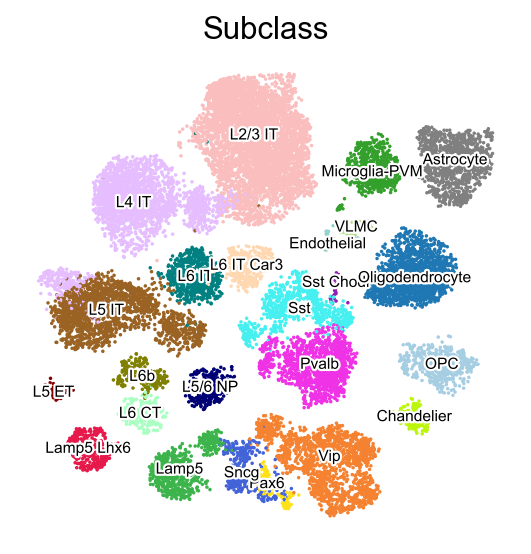

In [9]:
sc.pl.embedding(adata,
    basis='X_umap',
    color=['Subclass'],
    palette=piaso.pl.color.d_color3,
    legend_fontoutline=2,
    legend_fontsize=7,
    legend_fontweight=5,
    legend_loc='on data',
    cmap='Spectral_r',
    ncols=3,
    size=10,
    frameon=False)

#### Use the continous color map

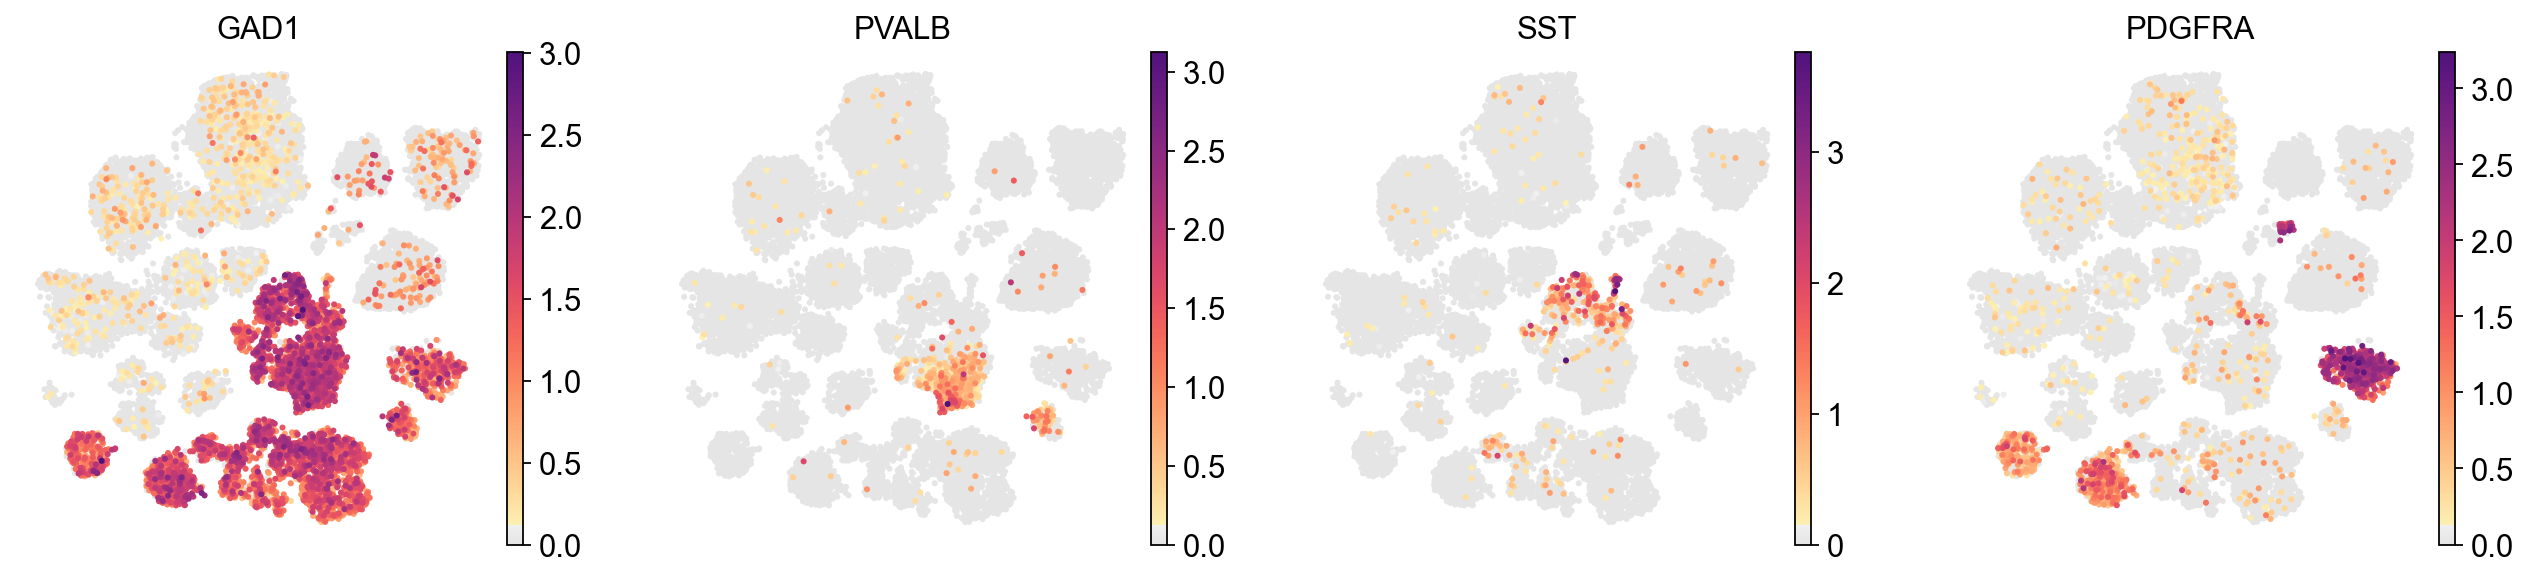

In [10]:
sc.pl.umap(adata,
           color=['GAD1', 'PVALB', 'SST', 'PDGFRA'],
           cmap=piaso.pl.color.c_color1,
           legend_fontsize=10,
           legend_fontoutline=3,
           ncols=4,
           size=30,
           frameon=False)

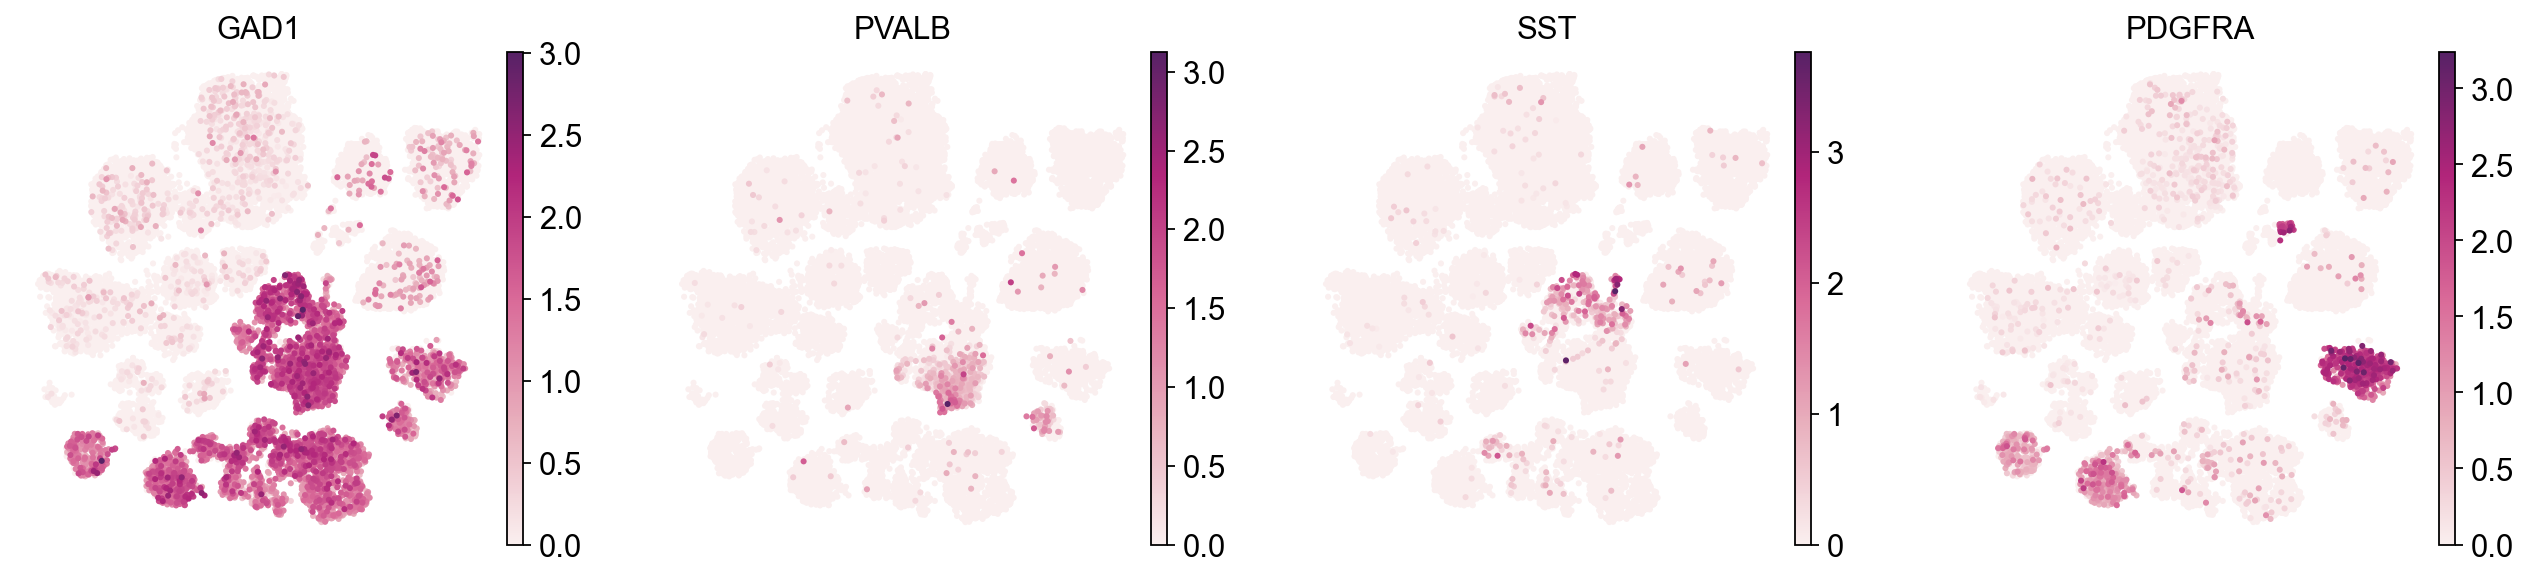

In [11]:
sc.pl.umap(adata,
           color=['GAD1', 'PVALB', 'SST', 'PDGFRA'],
           cmap=piaso.pl.color.c_color4,
           legend_fontsize=10,
           legend_fontoutline=3,
           ncols=4,
           size=30,
           frameon=False)

### Split the UMAP by condition

In [12]:
mapping_dict=dict(zip(adata.obs['CERAD score'], adata.obs['CERAD score']))

In [13]:
mapping_dict={'Absent': 'Absent',
 'Sparse': 'Disease',
 'Moderate': 'Disease',
 'Frequent': 'Disease'}

In [14]:
adata.obs['Condition']=adata.obs['CERAD score'].map(mapping_dict)

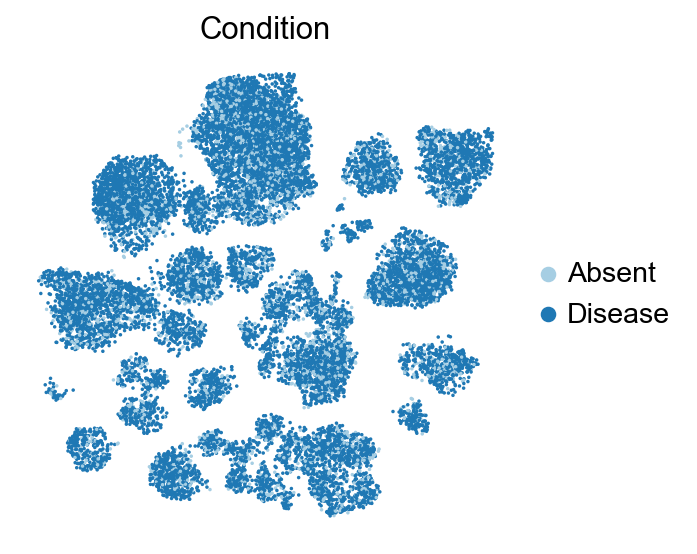

In [15]:
sc.pl.embedding(adata,
            basis='X_umap',
           color=['Condition'],
           palette=piaso.pl.color.d_color2,
           legend_fontoutline=2,
           legend_fontweight=5,
           cmap='Spectral_r',
           ncols=3,
           size=10,
           frameon=False)

In [16]:
importlib.reload(piaso)

<module 'piaso' from '/home/mid166/Analysis/Jupyter/Python/Package/PIASO_github/piaso/__init__.py'>

In [17]:
from scipy import sparse
sparse.isspmatrix(adata.X)

True

##### For gene expression

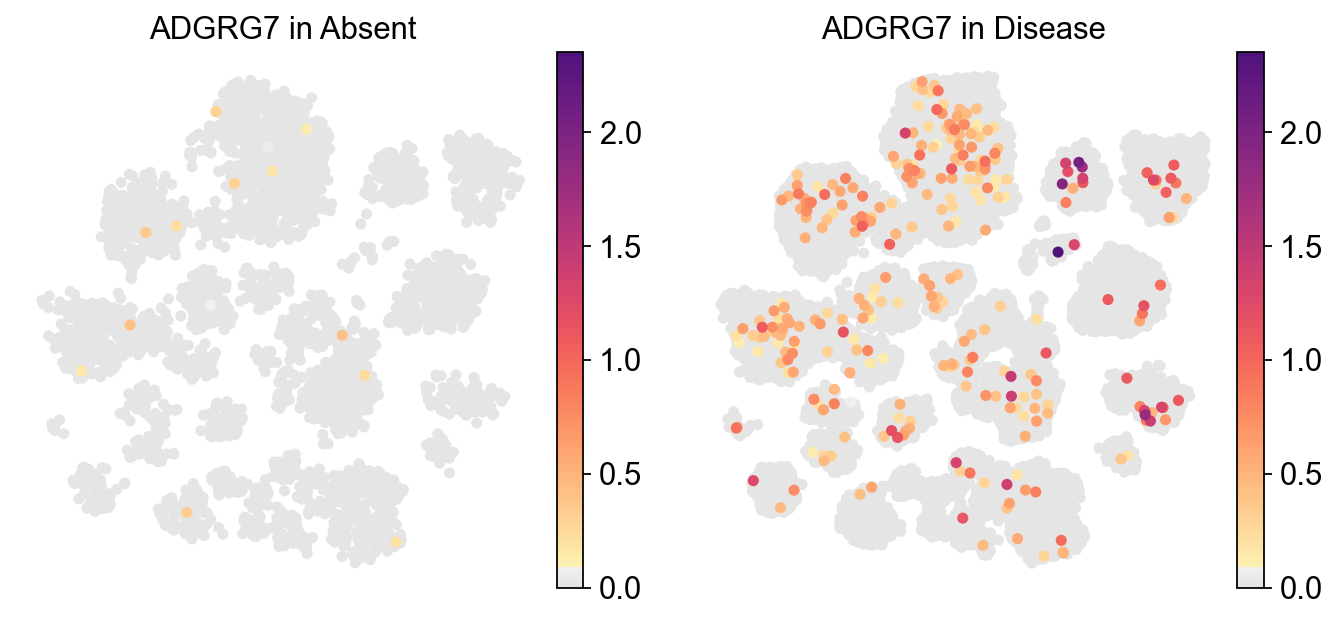

In [18]:
piaso.pl.plot_embeddings_split(adata,
                               color='ADGRG7',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color1,
                               size=100,
                               frameon=False,
                               legend_loc=None,
             )

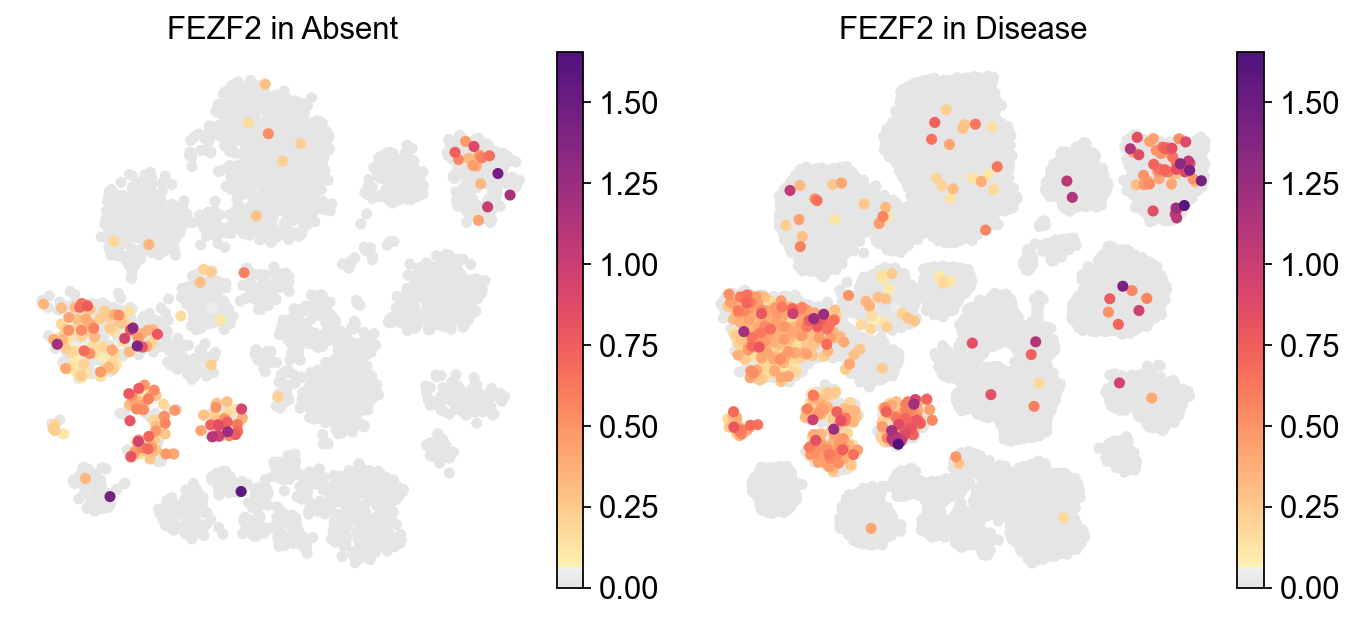

In [19]:
piaso.pl.plot_embeddings_split(adata,
                               color='FEZF2',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color1,
                               size=100,
                               frameon=False,
                               legend_loc=None,
             )

##### For continuous variables

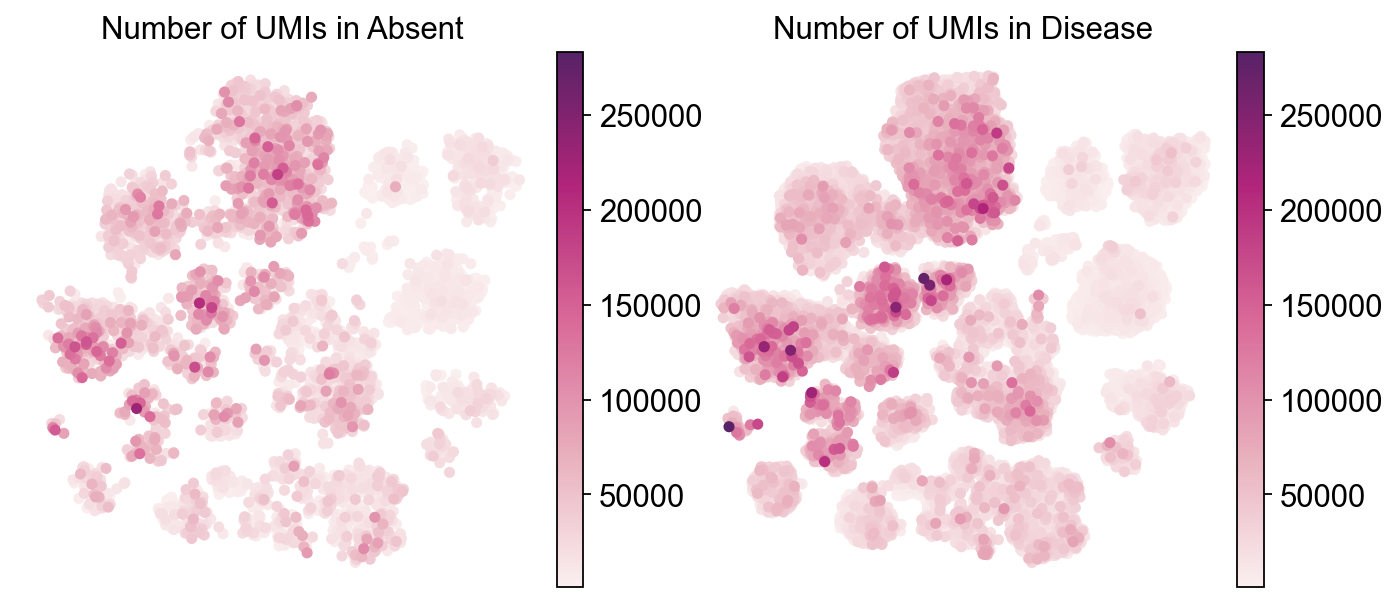

In [20]:
piaso.pl.plot_embeddings_split(adata,
                               color='Number of UMIs',
                               layer=None,
                               splitby='Condition',
                               color_map=piaso.pl.color.c_color4,
                               size=100,
                               frameon=False,
                               legend_loc=None,
             )

##### For categorical variables

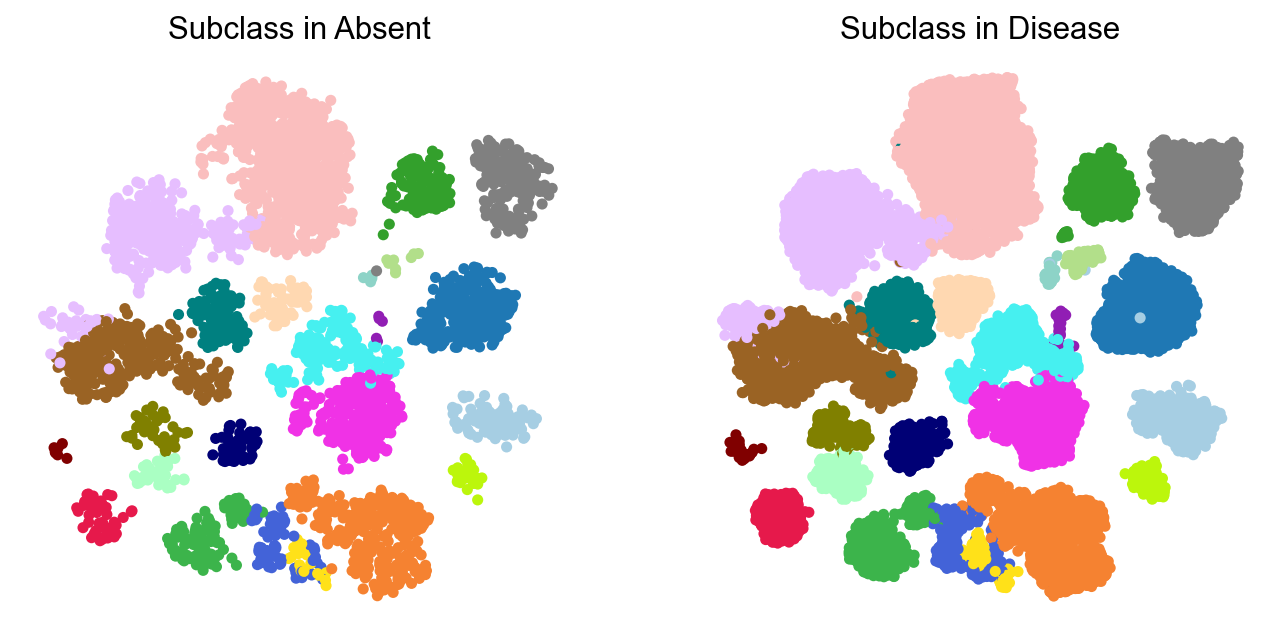

In [21]:
piaso.pl.plot_embeddings_split(adata,
                               color='Subclass',
                               layer=None,
                               splitby='Condition',
                               size=100,
                               frameon=False,
                               legend_loc=None,
             )

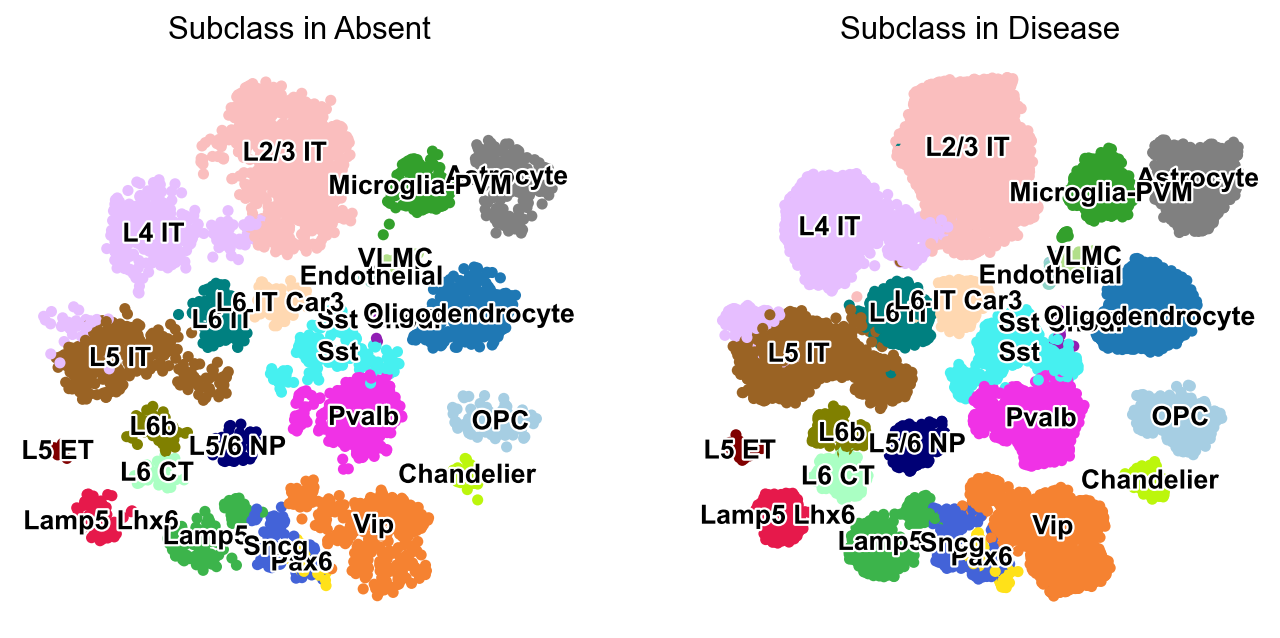

In [22]:
piaso.pl.plot_embeddings_split(adata,
    color='Subclass',
    layer=None,
    splitby='Condition',
    size=100,
    frameon=False,
    legend_loc='on data',
             )

#### Output the figure as pdf

Use the `save` parameter to specific the file name and path to save:

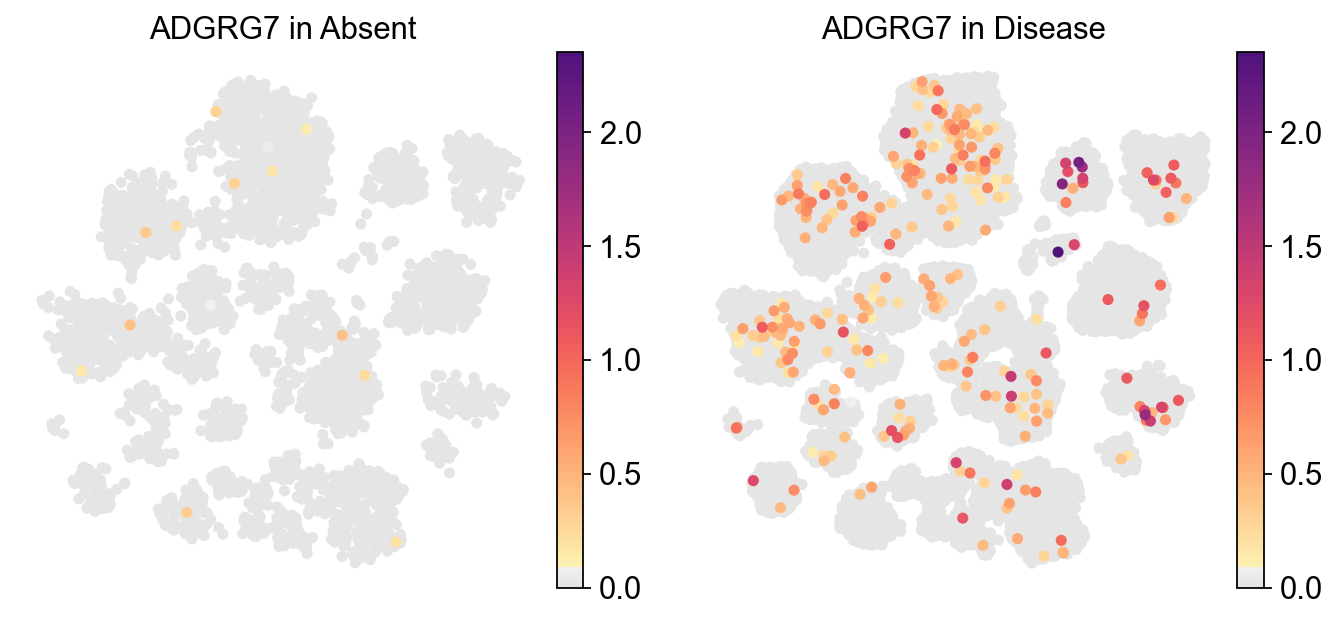

Figure saved to:  ./PIASO_UMAP_split_by_condition.pdf


In [23]:
piaso.pl.plot_embeddings_split(adata,
    color='ADGRG7',
    layer=None,
    splitby='Condition',
    color_map=piaso.pl.color.c_color1,
    size=100,
    frameon=False,
    legend_loc=None,
    save='./PIASO_UMAP_split_by_condition.pdf'
             )

### Violin plot by rows

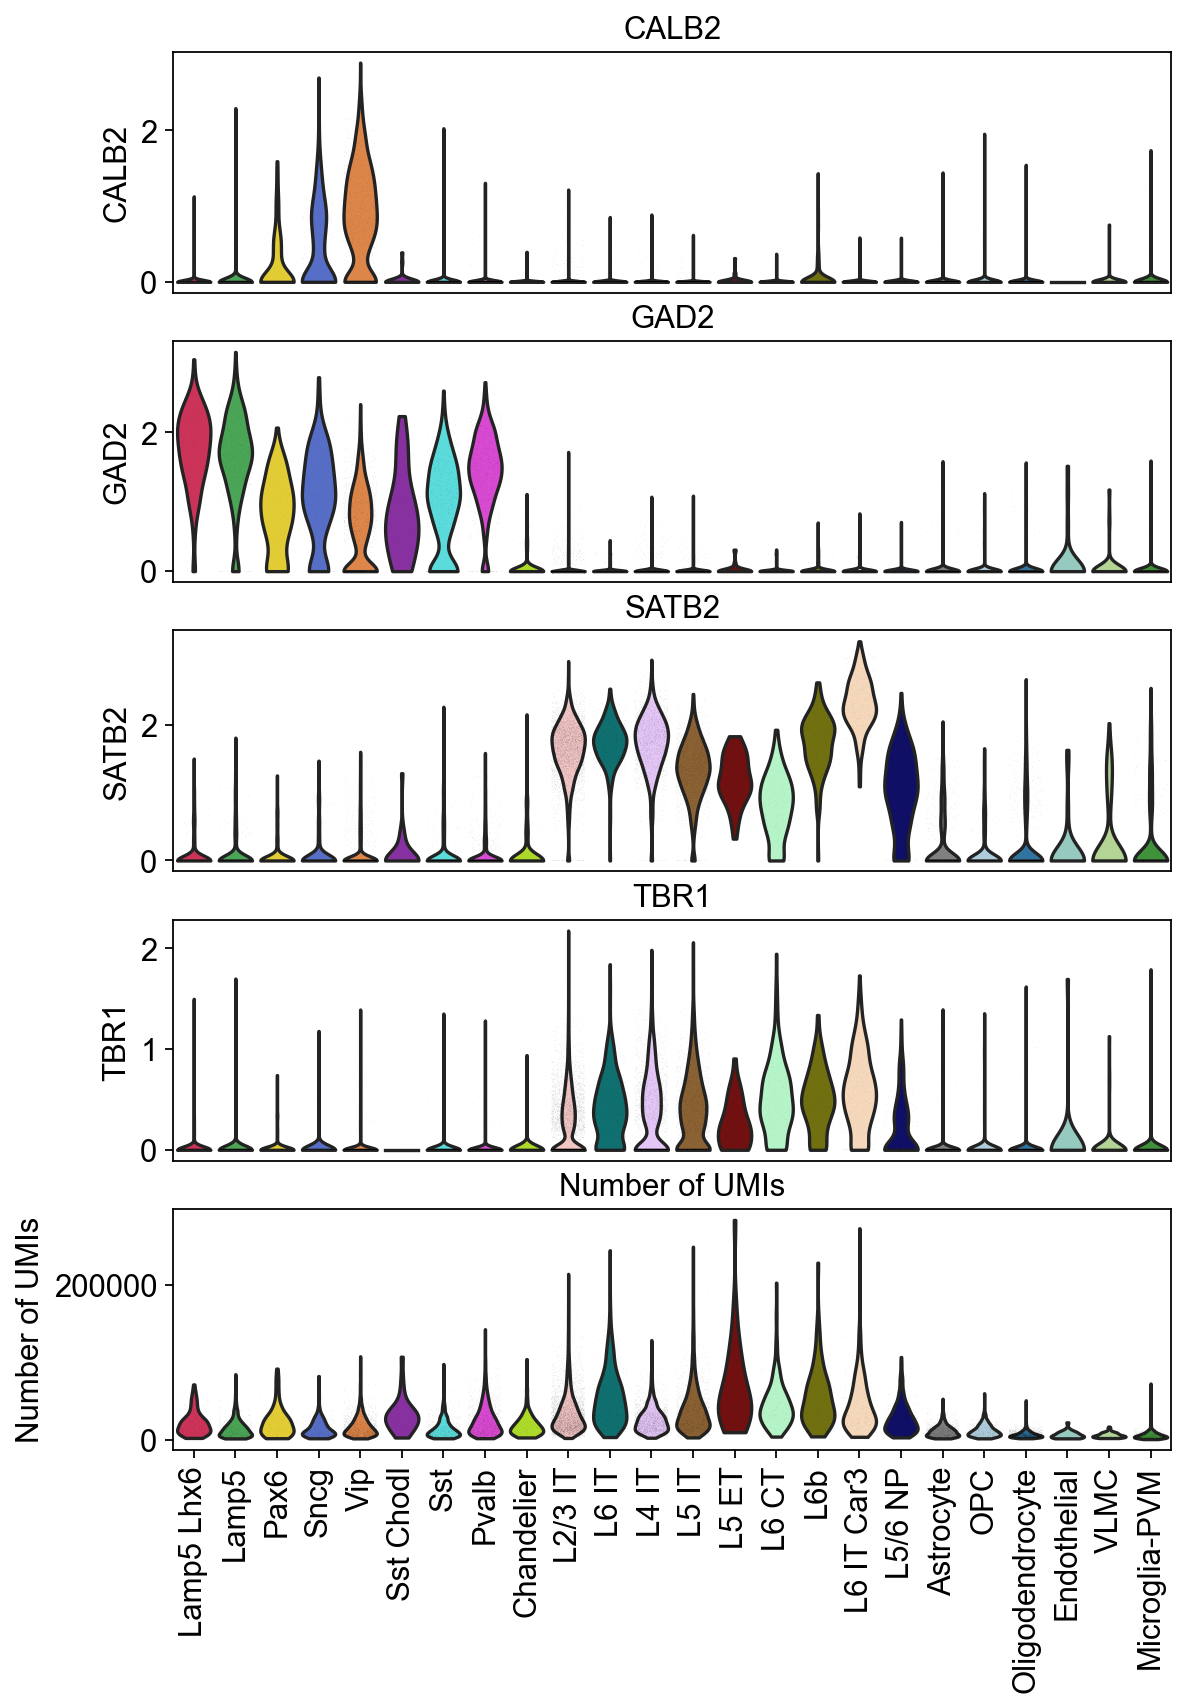

In [25]:
piaso.pl.plot_features_violin(adata,
    feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
    width_single=8,
    height_single=2.3,
    groupby='Subclass',
    show_grid=False
                             )

Add the horizontal grid line:

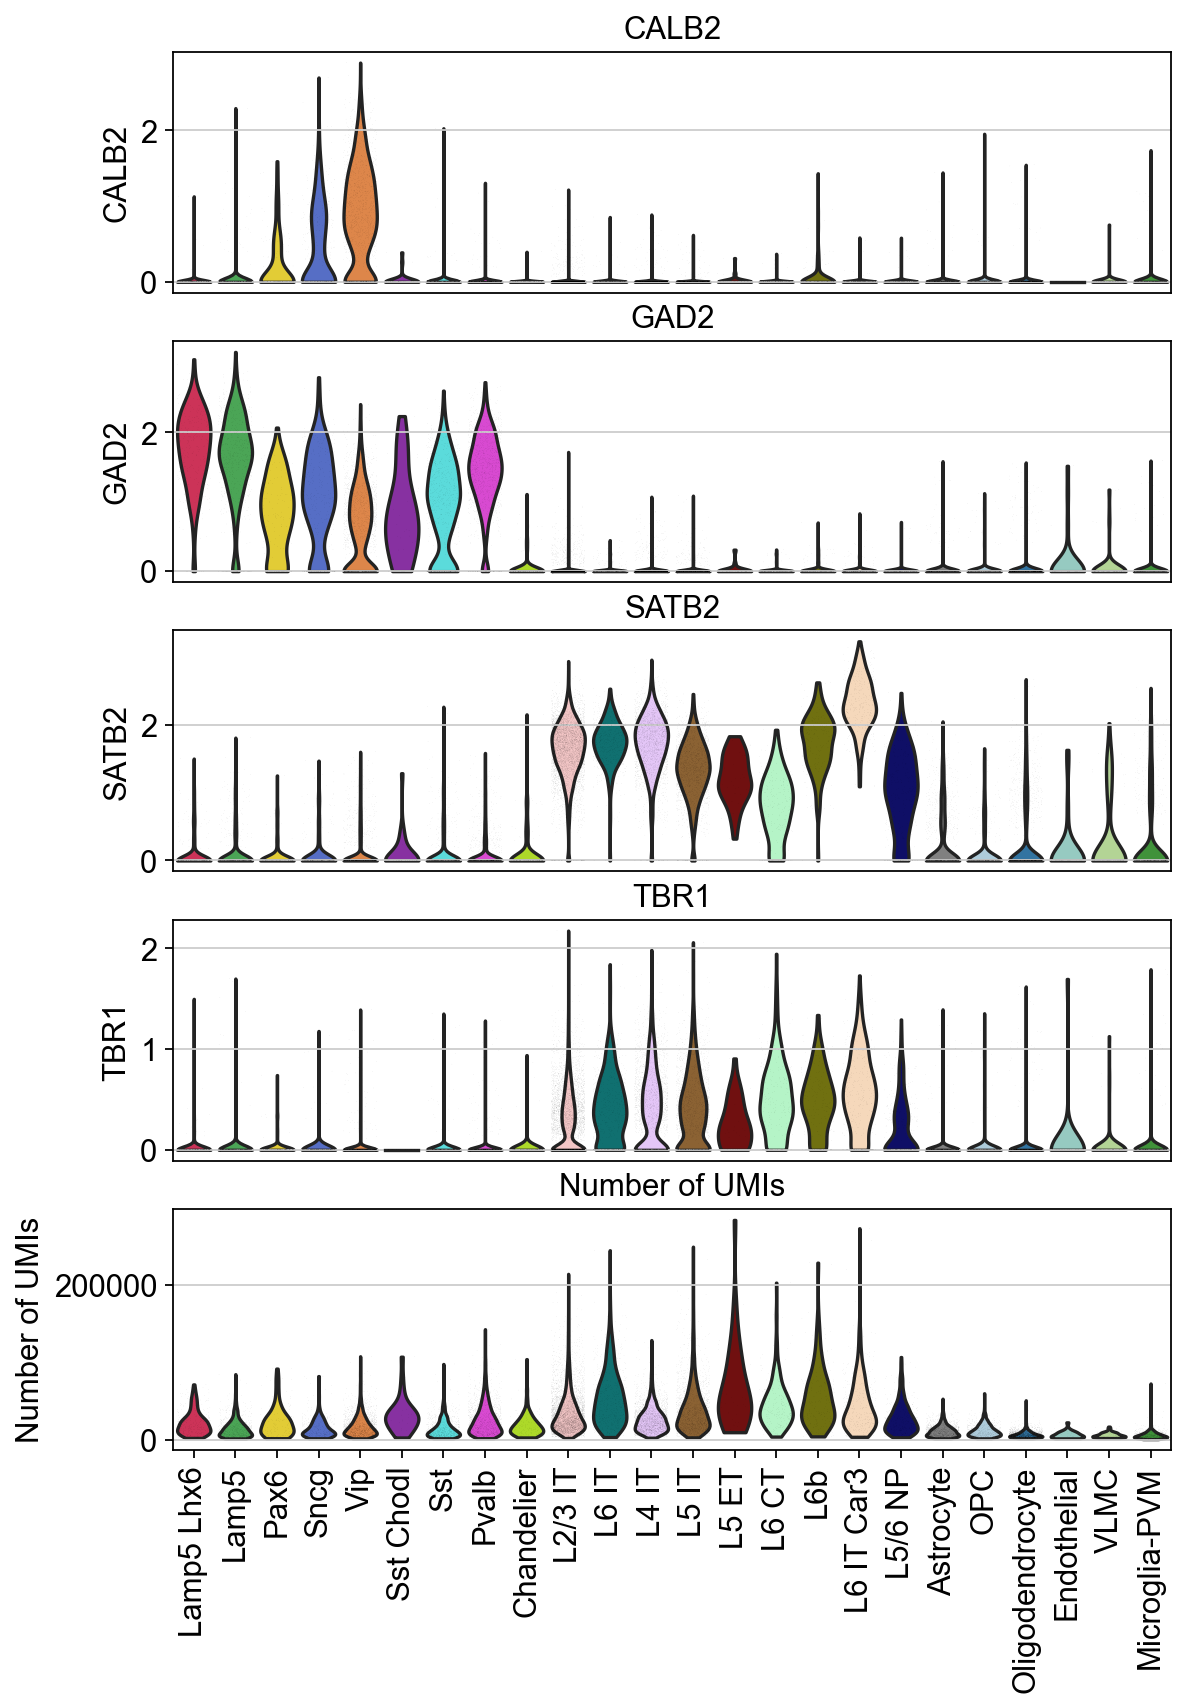

In [26]:
piaso.pl.plot_features_violin(adata,
       feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
        width_single=8,
        height_single=2.3,
         groupby='Subclass',
                             )

Change the width and height:

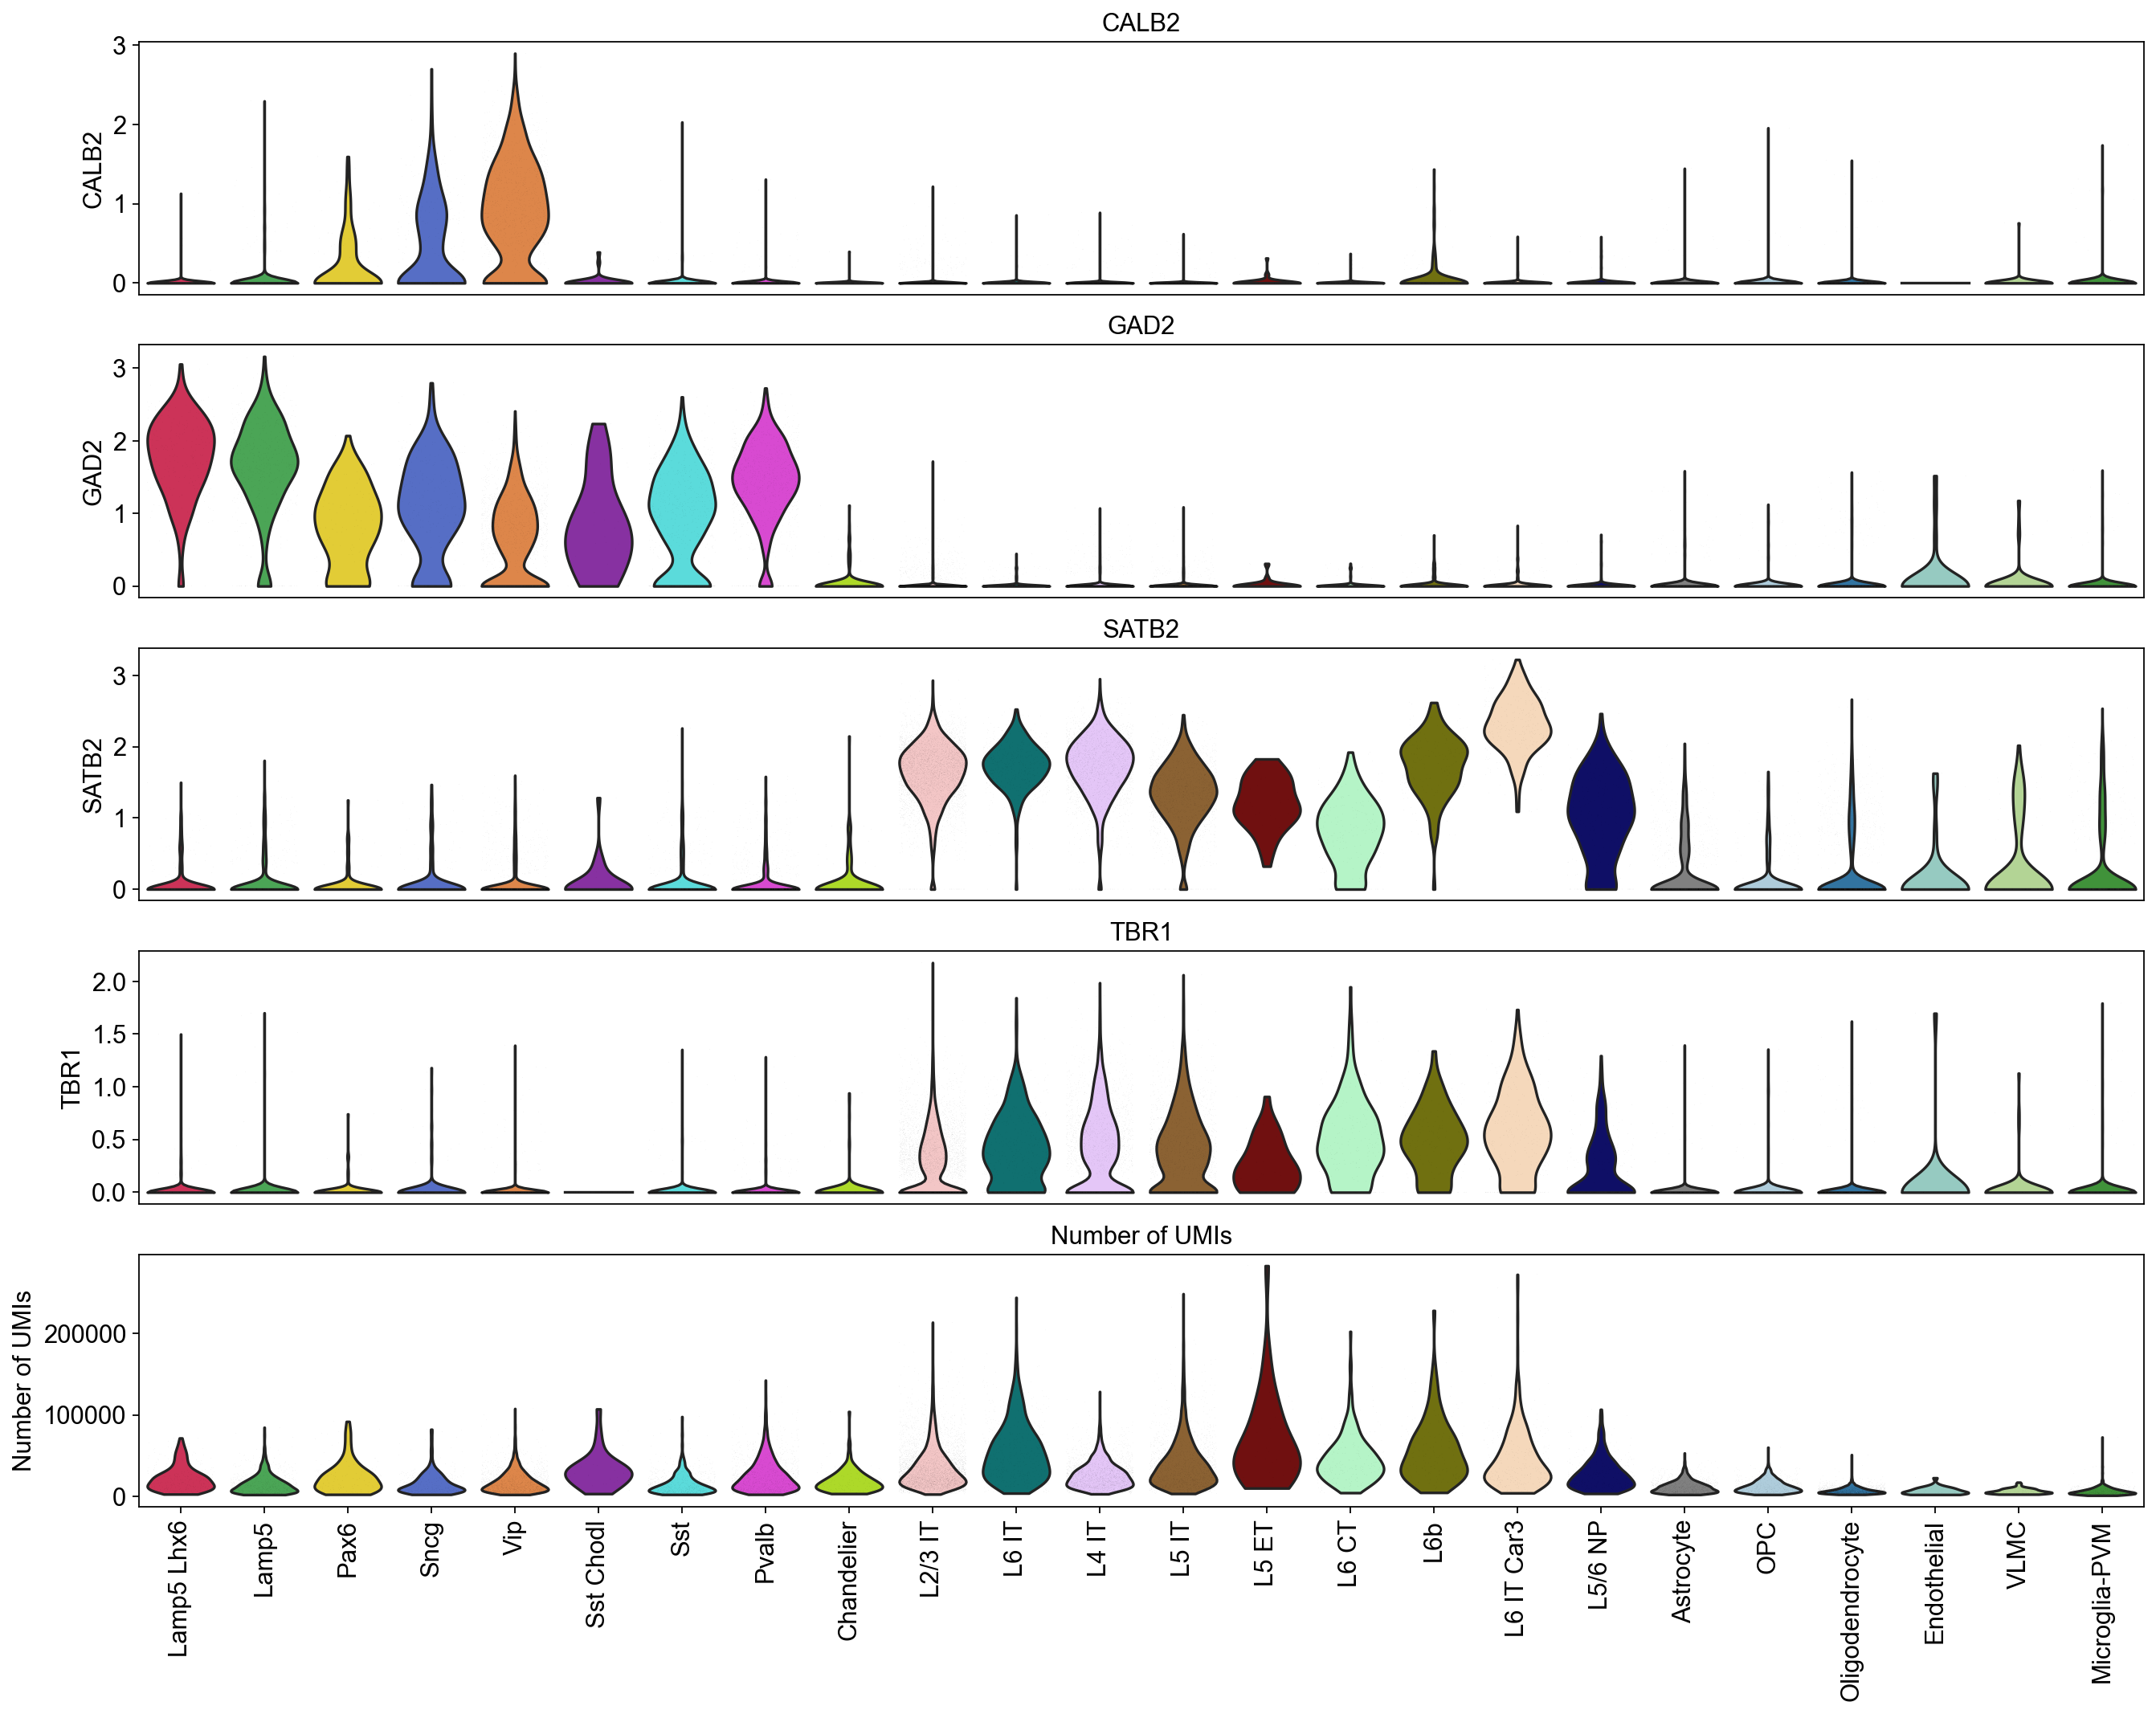

In [33]:
piaso.pl.plot_features_violin(adata,
    feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
    width_single=20,
    height_single=3,
    groupby='Subclass',
    show_grid=False
                             )

Show all cells as one group and change the dot size:

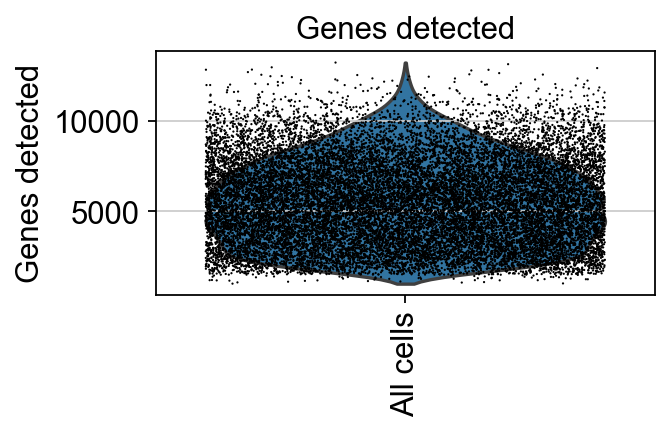

In [27]:
piaso.pl.plot_features_violin(adata,
    feature_list=[ 'Genes detected'],
    width_single=4,
    height_single=2.0,
    size=1,
                             )

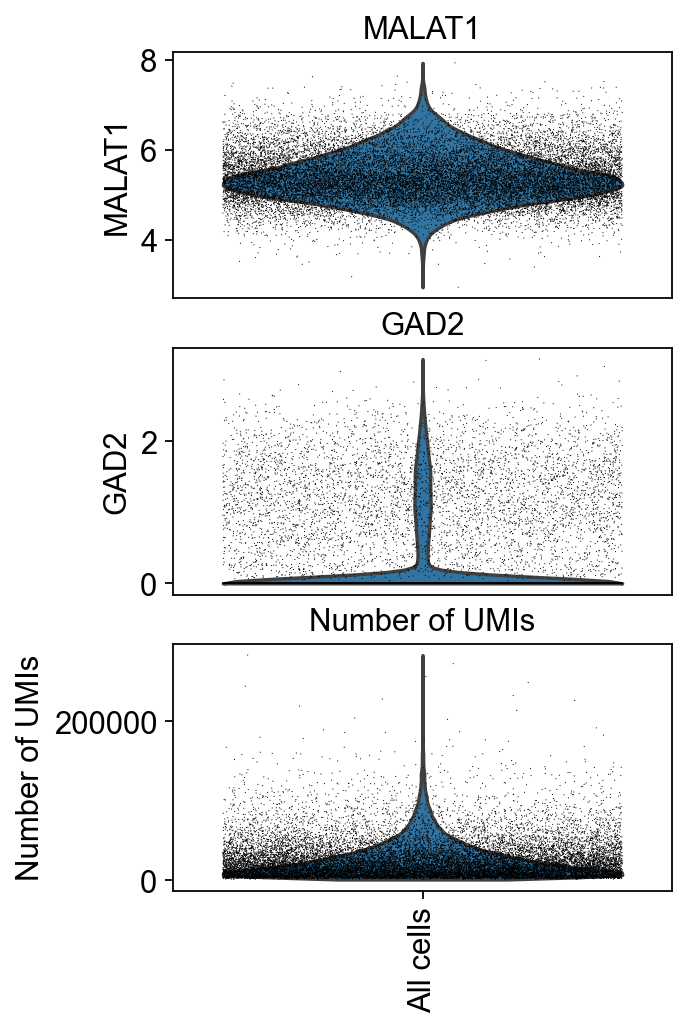

In [28]:
piaso.pl.plot_features_violin(adata,
    feature_list=[ 'MALAT1', 'GAD2', 'Number of UMIs'],
    width_single=4,
    height_single=2.3,
    size=0.5,
    show_grid=False
                             )

##### Output the violin plot

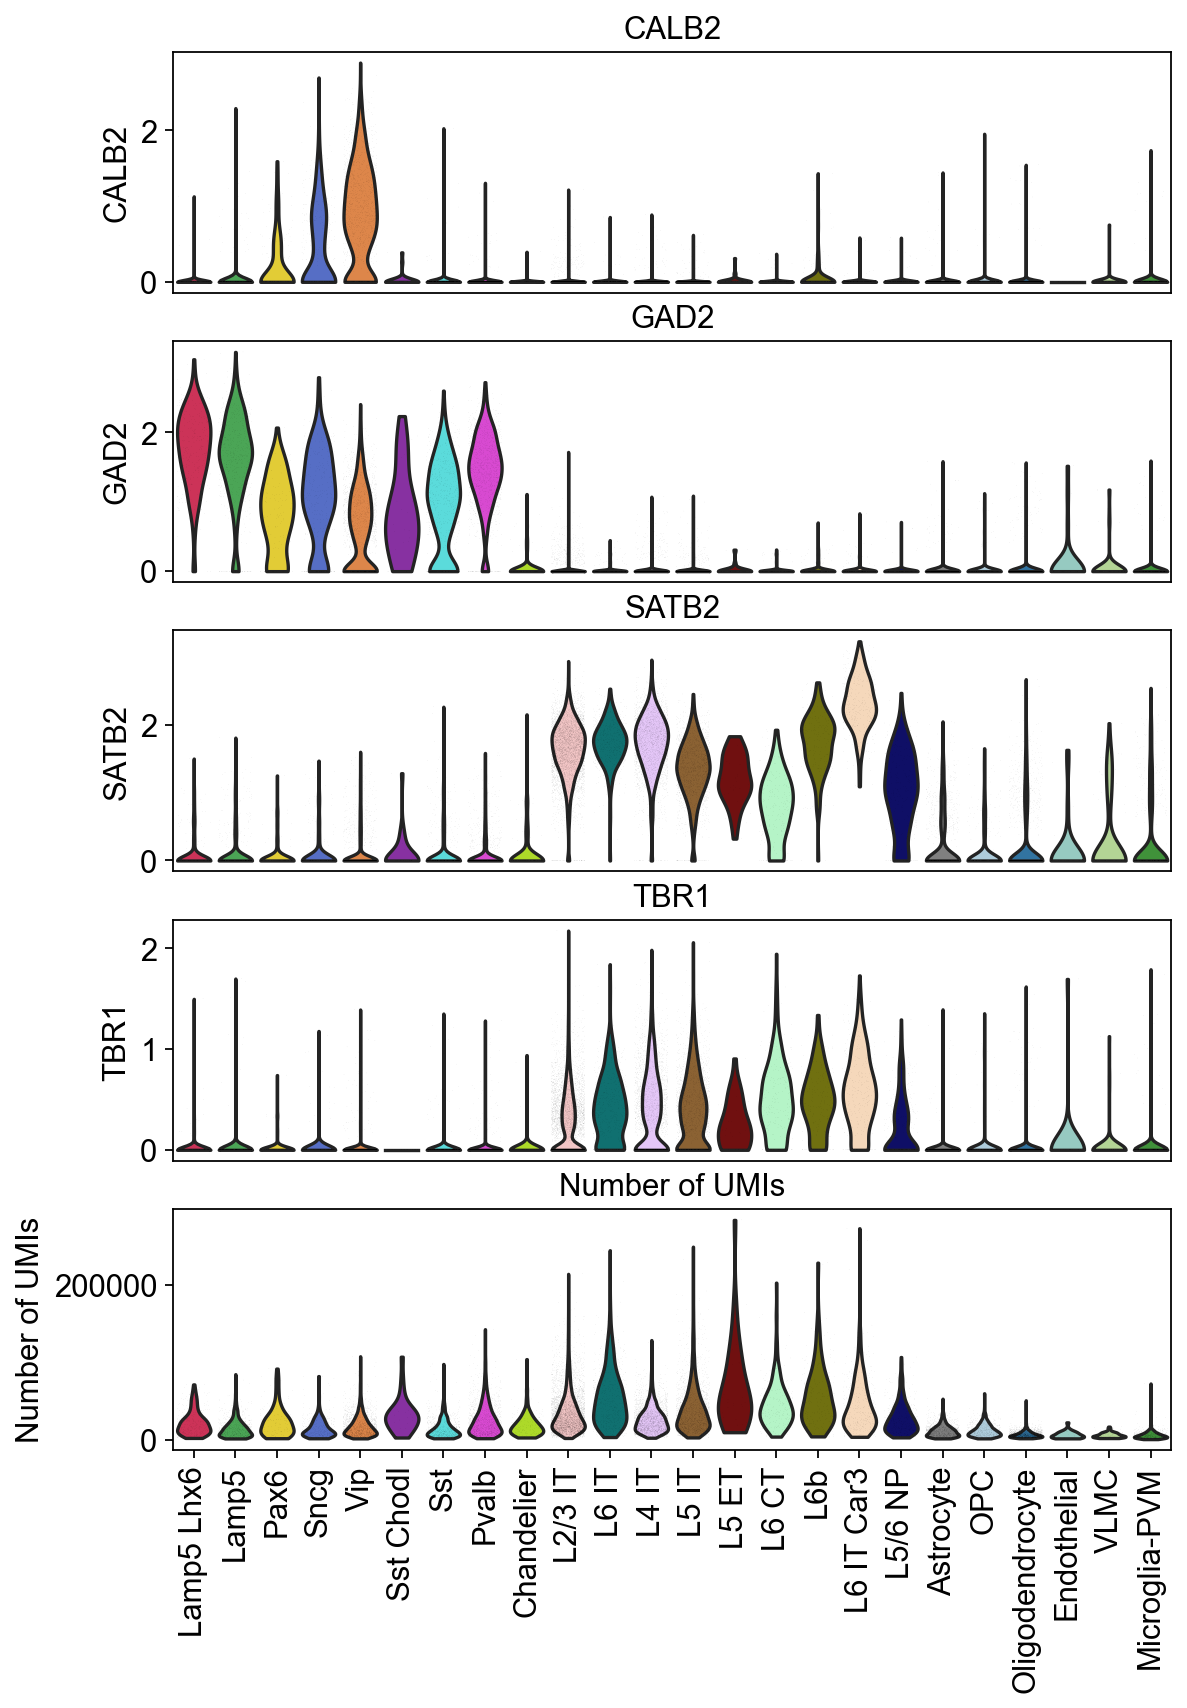

Figure saved to: ./violin_plot_piaso.pdf


In [29]:
piaso.pl.plot_features_violin(adata,
    feature_list=[ 'CALB2', 'GAD2', 'SATB2', 'TBR1', 'Number of UMIs'],
    width_single=8,
    height_single=2.3,
    groupby='Subclass',
    show_grid=False,
    save='./violin_plot_piaso.pdf'
                             )